# **Car Price Prediction 🚗💰**

## **Overview**
This project aims to develop a machine learning model for **predicting car prices** based on various features such as brand, model, year, engine size, fuel type, transmission, and mileage. The goal is to create a model that helps users estimate the value of a car based on its characteristics.

## **Dataset Description**
The dataset consists of the following features:

- **Brand**: Manufacturer of the car (e.g., Toyota, BMW, Ford).
- **Model**: The specific model name of the car.
- **Year**: The year the car was manufactured.
- **Engine_Size**: Engine size in liters (L).
- **Fuel_Type**: Type of fuel used (e.g., Petrol, Diesel, Electric).
- **Transmission**: Type of transmission (e.g., Manual, Automatic).
- **Mileage**: The total distance the car has traveled.
- **Doors**: Number of doors in the car.
- **Owner_Count**: Number of previous owners.
- **Price**: The target variable (car price).

## **Project Workflow**
1. **Data Preprocessing**
   - Handling missing values.
   - Encoding categorical features (Brand, Model, Fuel_Type, Transmission).
   - Scaling numerical features (Mileage, Engine_Size, Year).

2. **Exploratory Data Analysis (EDA)**
   - Understanding feature distributions.
   - Identifying correlations between features and price.
   - Detecting and handling outliers.

3. **Feature Engineering**
   - Creating new features (e.g., **Car Age = Current Year - Year**).
   - Selecting the most important features affecting price.

4. **Model Training & Evaluation**
   - Training regression models:
     - **Linear Regression**
     - **Decision Tree Regressor**
     - **Random Forest Regressor**
     - **Gradient Boosting Models (XGBoost, LightGBM)**
   - Evaluating model performance using:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**

5. **Model Monitor**
   - Monitoring the data for data drift using NannyML.
   - Understanding the business value of the model.

6. **Model Deployment**
   - Deploying the trained model using Flask.
   - Building a web interface for users to enter car details and get a price estimate using react node js.

---

📌 **Next Step:** Start by loading and exploring the dataset! 📊


In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

%matplotlib inline 

In [2]:
data = pd.read_csv(f'../classification/class/data/car_price_dataset.csv')

In [3]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
data.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [6]:
df = data.copy()

In [7]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'Price' and data[col].nunique()> 20]
dis_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and data[col].nunique()< 20]
obj_cols = [col for col in data.columns if data[col].dtype == 'object']
target = 'Price'

## Numerical Analysis

In [8]:
data[num_cols].describe()

,Year,Engine_Size,Mileage
count,10000.000000,10000.000000,10000.000000
mean,2011.543700,3.000560,149239.111800
std,6.897699,1.149324,86322.348957
min,2000.000000,1.000000,25.000000
25%,2006.000000,2.000000,74649.250000
50%,2012.000000,3.000000,149587.000000
75%,2017.000000,4.000000,223577.500000
max,2023.000000,5.000000,299947.000000


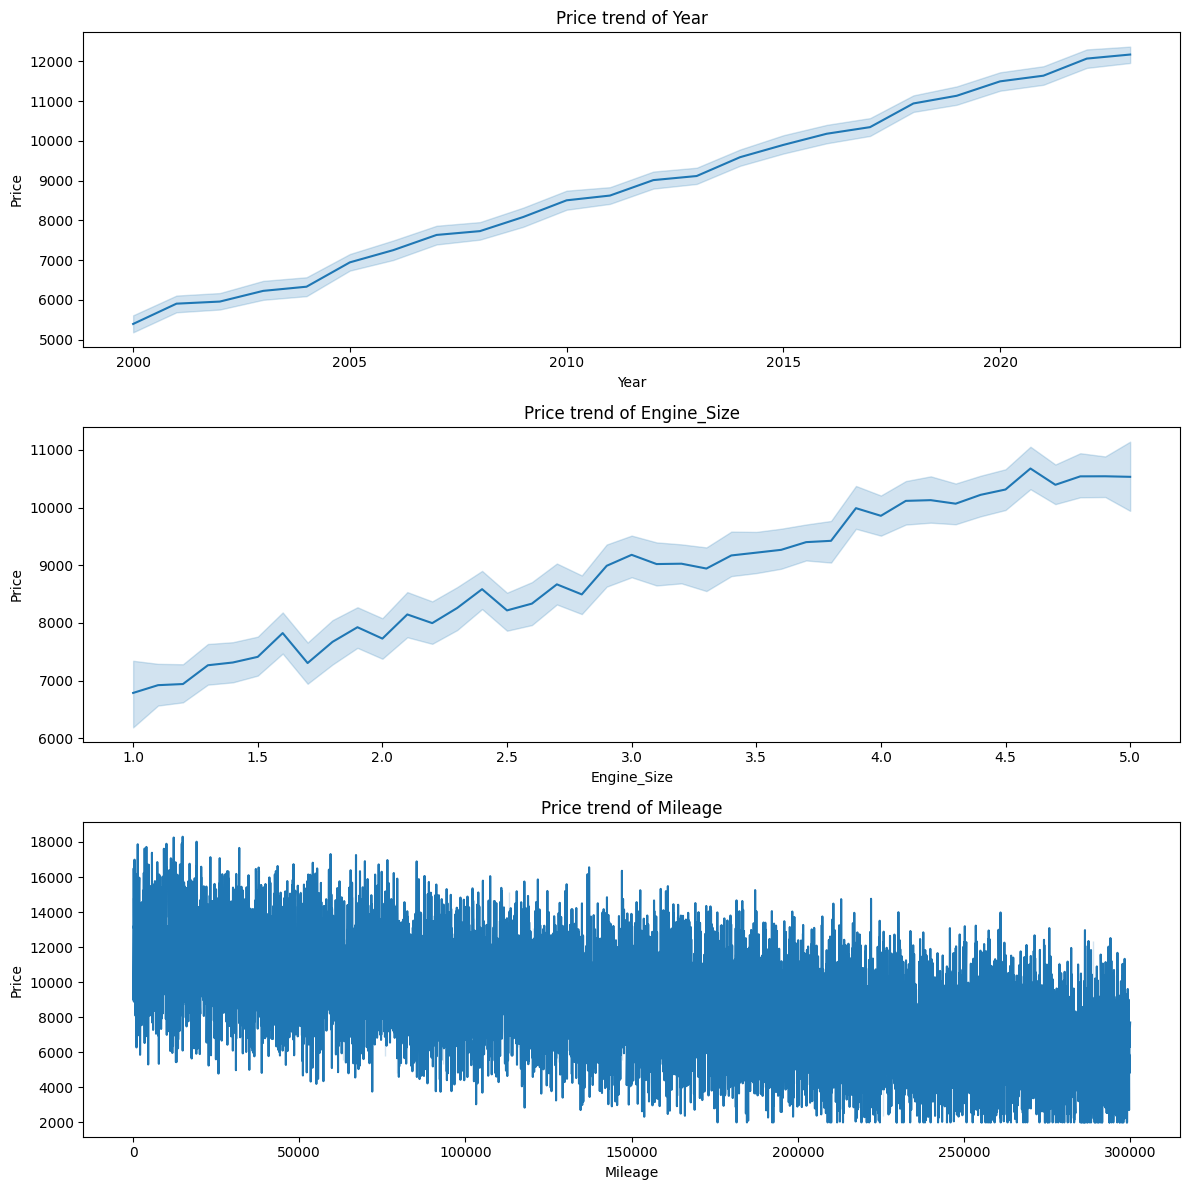

In [9]:
fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, figsize = (12, 12))

for id, col in enumerate(num_cols):
    sns.lineplot(x= col, y=target, data=data, ax=ax[id])
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

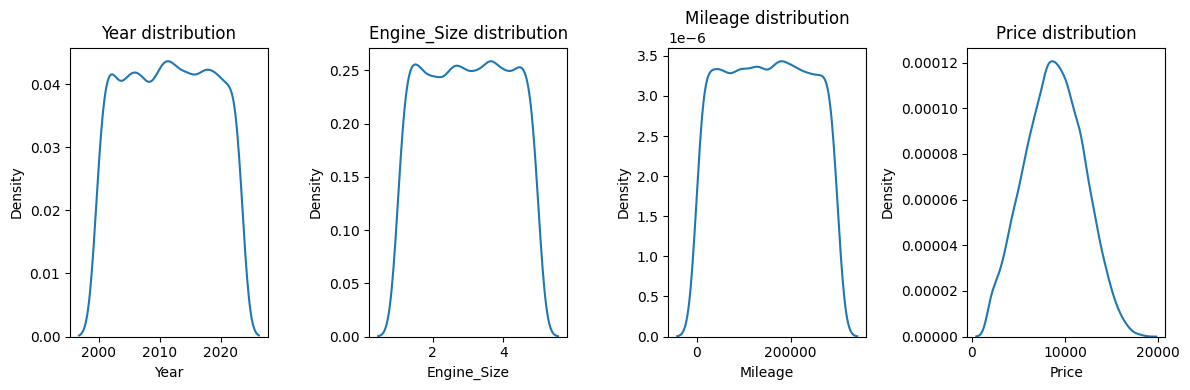

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols + [target]), figsize = (12, 4))
for id, col in enumerate(num_cols + [target]): 
    sns.kdeplot(x= col, data=data, ax=ax[id])
    ax[id].set_title(f"{col} distribution")

plt.tight_layout()

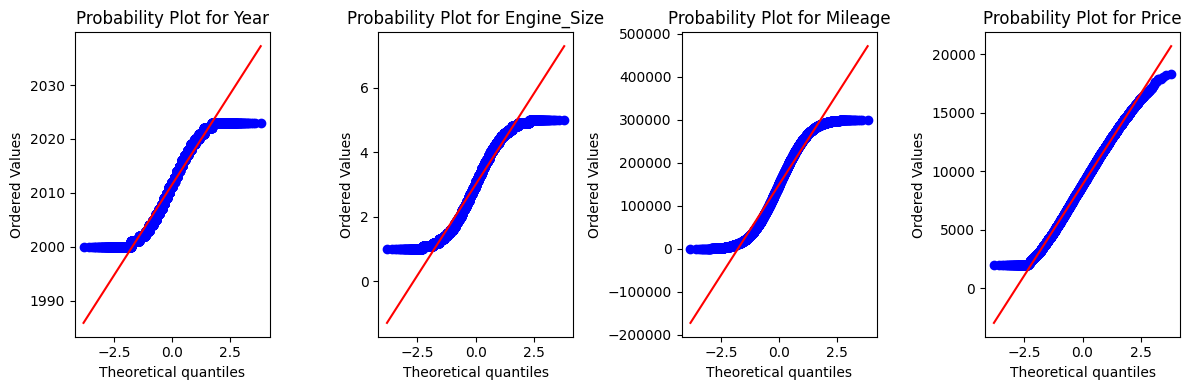

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols + [target]), figsize = (12, 4))
for id, col in enumerate(num_cols + [target]):
    stats.probplot(data[col], dist="norm", plot=ax[id])
    ax[id].set_title(f'Probability Plot for {col}')

plt.tight_layout()


<Axes: >

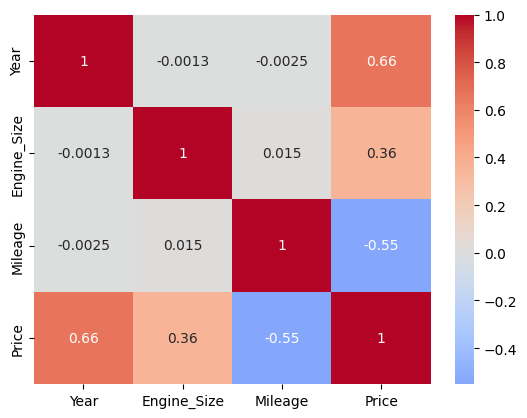

In [12]:
sns.heatmap(data[num_cols + [target]].corr(), annot=True, cmap='coolwarm', center=0)

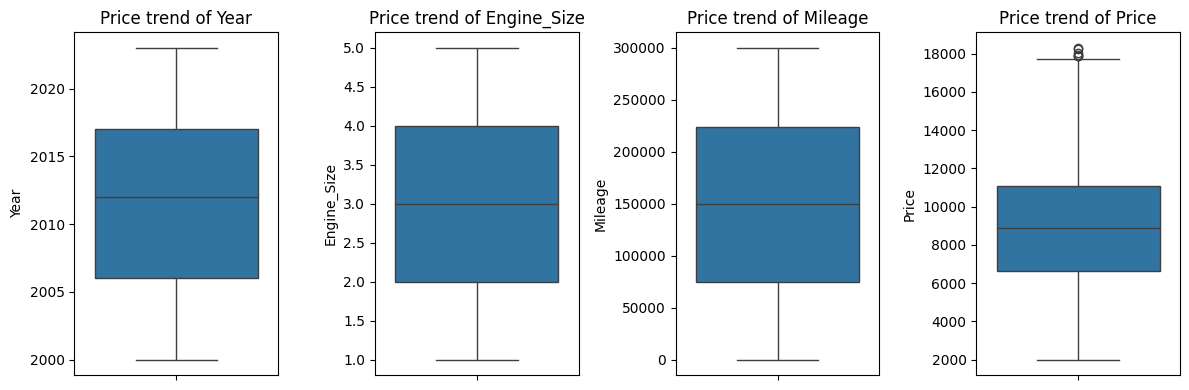

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols + [target]), figsize = (12, 4))

for id, col in enumerate(num_cols + [target]):
    sns.boxplot(y= col, data=data, ax=ax[id])
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

### Conclusion of Numeric Analysis

The numeric columns—**Year**, **Engine_Size**, and **Mileage**—have data types of either *int* or *float*, with value counts exceeding **20**. These columns exhibit uniform distributions, while **Price** is skewed to the right.  

- **Year** shows a strong correlation with **Price**, indicating a relationship between them. However, this does not necessarily mean that **Year** directly influences **Price**. The **Year** column does not contain outliers and does not follow a normal distribution, as observed in the Q-Q plot.  
- **Mileage** has a weak linear relationship with **Price**. It does not contain outliers and does not follow a normal distribution, as shown in the Q-Q plot.  
- **Engine_Size** has a weak linear relationship with **Price**. Similar to the other numeric columns, it does not contain outliers and does not follow a normal distribution, as indicated by the Q-Q plot.  
- **Price** does not follow a normal distribution, as shown in both the kernel density (KD) plot and the Q-Q plot. The KD plot indicates that **Price** is right-skewed, and further analysis with the Q-Q plot reveals a divergence from the center line, confirming the presence of outliers in the **Price** data.  

### Next Steps  
- Check for missing values in the numeric columns.  


In [14]:
missing_percentage = (data[num_cols].isna().sum() / len(data)) * 100
for col, perc in missing_percentage.items():
    print(f'{col}: {perc:.2f}%')

Year: 0.00%
Engine_Size: 0.00%
Mileage: 0.00%


## Catgorical Analysis

In [15]:
data[obj_cols].describe()

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


In [16]:
missing = (data[obj_cols].isna().sum() / len(data)) * 100
for col, perc in missing.items():
    print(f'{col}: {perc:.2f}%')

Brand: 0.00%
Model: 0.00%
Fuel_Type: 0.00%
Transmission: 0.00%


In [17]:
cat_cols  = [col for col in data.columns if data[col].dtype=='object' and data[col].nunique()<11]

In [18]:
cat_cols

['Brand', 'Fuel_Type', 'Transmission']

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/2983180750.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/2983180750.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/2983180750.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)


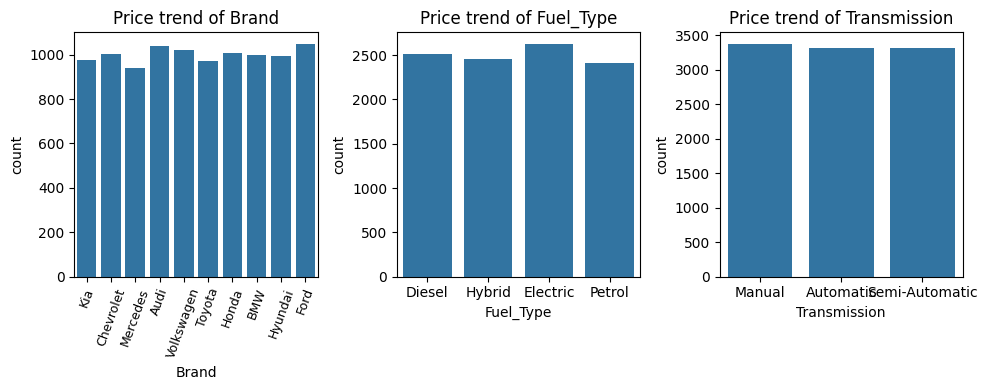

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=len(cat_cols), figsize = (10, 4))

for id, col in enumerate(cat_cols):
    sns.countplot(x= col, data=data, ax=ax[id])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3823902518.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3823902518.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3823902518.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)


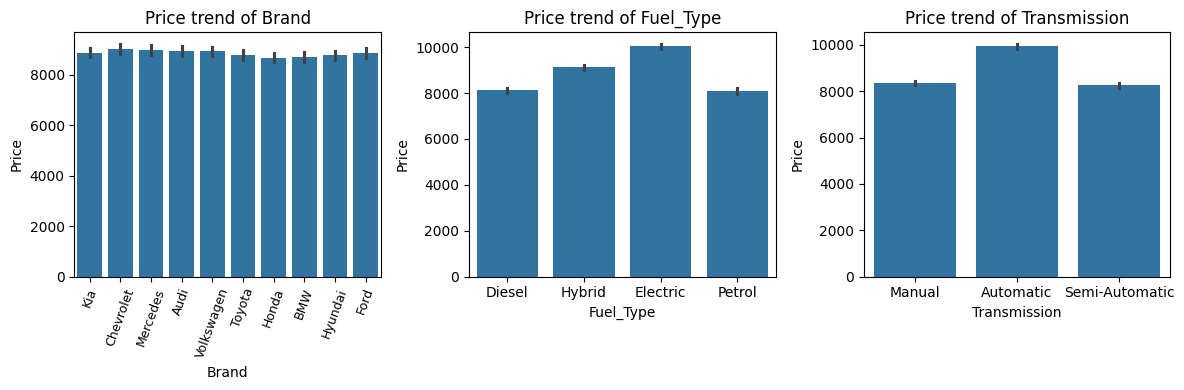

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=len(cat_cols), figsize = (12, 4))

for id, col in enumerate(cat_cols):
    sns.barplot(x= col, y=target,data=data, ax=ax[id])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3233886943.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3233886943.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
/var/folders/kf/yv1zrfvd701c47vqp5xz4sjh0000gn/T/ipykernel_83385/3233886943.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)


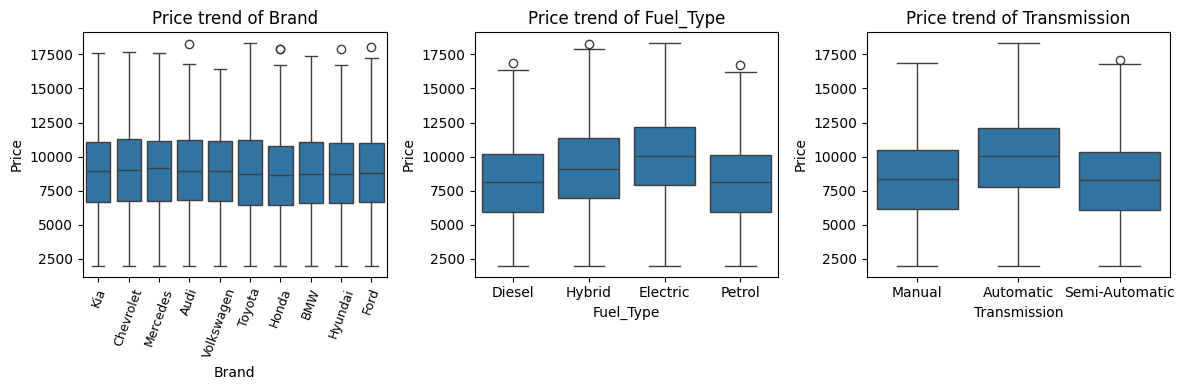

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=len(cat_cols), figsize = (12, 4))

for id, col in enumerate(cat_cols):
    sns.boxplot(x= col, y=target,data=data, ax=ax[id])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70, fontsize=9)
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

## Discete Analysis

In [22]:
data[dis_cols].describe()

,Doors,Owner_Count
count,10000.000000,10000.000000
mean,3.497100,2.991100
std,1.110097,1.422682
min,2.000000,1.000000
25%,3.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [23]:
missing = (data[dis_cols].isna().sum() / len(data)) * 100
for col, perc in missing.items():
    print(f'{col}: {perc:.2f}%')

Doors: 0.00%
Owner_Count: 0.00%


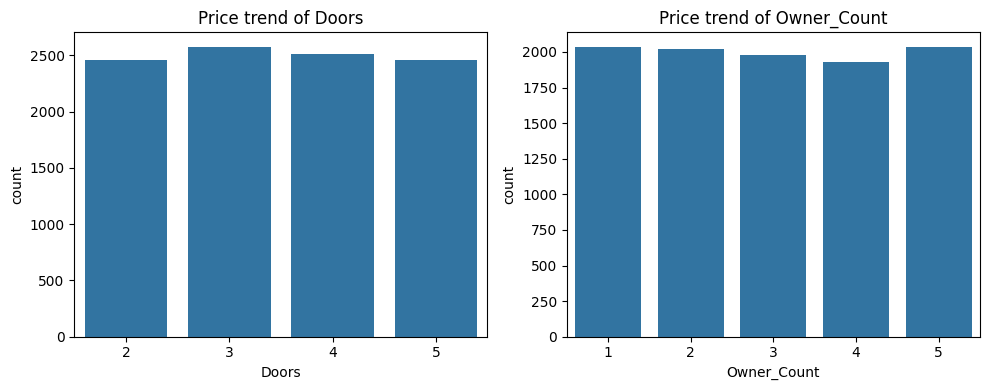

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=len(dis_cols), figsize = (10, 4))

for id, col in enumerate(dis_cols):
    sns.countplot(x= col, data=data, ax=ax[id])
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

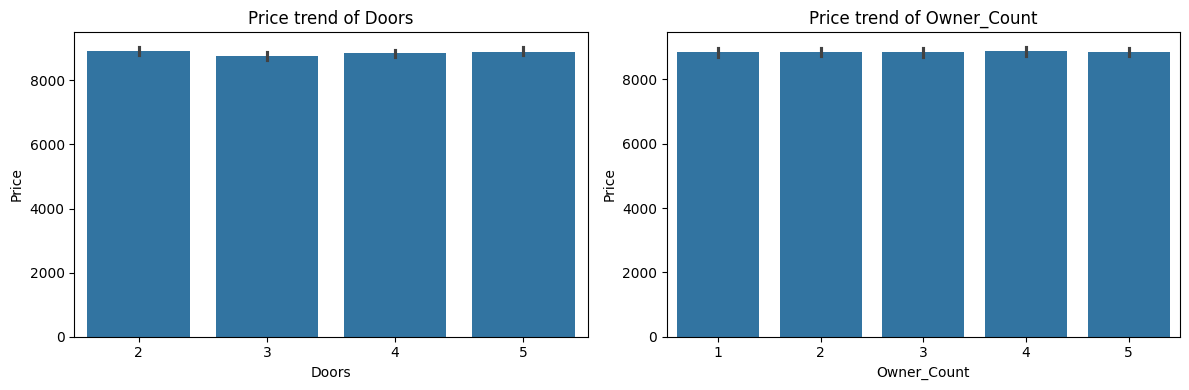

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=len(dis_cols), figsize = (12, 4))

for id, col in enumerate(dis_cols):
    sns.barplot(x= col, y=target,data=data, ax=ax[id])
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

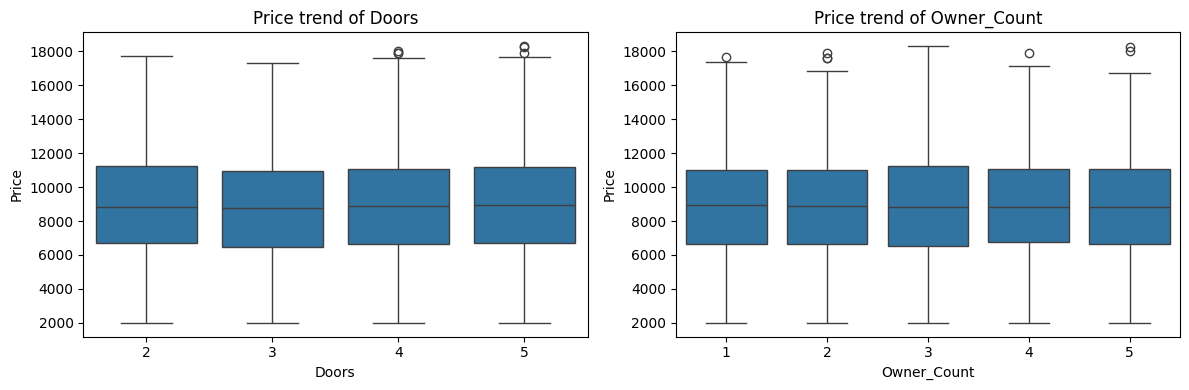

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=len(dis_cols), figsize = (12, 4))

for id, col in enumerate(dis_cols):
    sns.boxplot(x= col, y=target,data=data, ax=ax[id])
    ax[id].set_title(f"{target} trend of {col}")

plt.tight_layout()

## Feature Engineering

In [27]:
data['Transmission'].value_counts()

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64

In [28]:
data['Transmission'] = data['Transmission'].map({'Manual':0, 'Semi-Automatic':1, 'Automatic':2})

In [29]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,0,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,2,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,2,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,0,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,1,286618,3,3,2867


In [30]:
data = pd.get_dummies(data, columns=['Brand', 'Model', 'Fuel_Type'], drop_first=True).astype('int')

In [31]:
current_year = datetime.now().year
print(current_year)

2025


In [32]:
data['Age'] = current_year - data['Year']

In [33]:
data.head()

,Year,Engine_Size,Transmission,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Age
0,2020,4,0,289944,3,5,8501,0,0,0,...,1,0,0,0,0,0,0,0,0,5
1,2012,2,2,5356,2,3,12092,0,1,0,...,0,0,0,0,0,0,0,1,0,13
2,2020,4,2,231440,4,2,11171,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,2023,2,0,160971,2,1,11780,0,0,0,...,0,0,0,0,0,0,1,0,0,2
4,2003,2,1,286618,3,3,2867,0,0,0,...,0,0,0,0,0,0,0,1,0,22


In [34]:
X = data.drop(labels=['Price'], axis = 1)

y = data['Price']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

## Model Analysis

In [36]:
stand = StandardScaler()
x_train_scale = stand.fit_transform(x_train)
x_test_scale = stand.transform(x_test)

In [37]:
lin = LinearRegression()
lin.fit(x_train_scale, y_train)
y_pred = lin.predict(x_test_scale)

print(f'Test r2 score  : {r2_score(y_test, y_pred):.2f}')
print(f'Test mean absolute error  : {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Test mean squared error  : {mean_squared_error(y_test, y_pred):.2f}')
print(f'Test root mean squared  : {root_mean_squared_error(y_test, y_pred):.2f}')

Test r2 score  : 0.98
Test mean absolute error  : 377.40
Test mean squared error  : 210020.66
Test root mean squared  : 458.28


In [38]:

print(f'Train r2 score  : {r2_score(y_train, lin.predict(x_train_scale)):.2f}')
print(f'Train mean absolute error  : {mean_absolute_error(y_train, lin.predict(x_train_scale)):.2f}')
print(f'Train mean squared error  : {mean_squared_error(y_train, lin.predict(x_train_scale)):.2f}')
print(f'Train root mean squared  : {root_mean_squared_error(y_train, lin.predict(x_train_scale)):.2f}')

Train r2 score  : 0.98
Train mean absolute error  : 373.75
Train mean squared error  : 208588.36
Train root mean squared  : 456.71


Text(0.5, 1.0, 'Plot Showing Predicted against actual price')

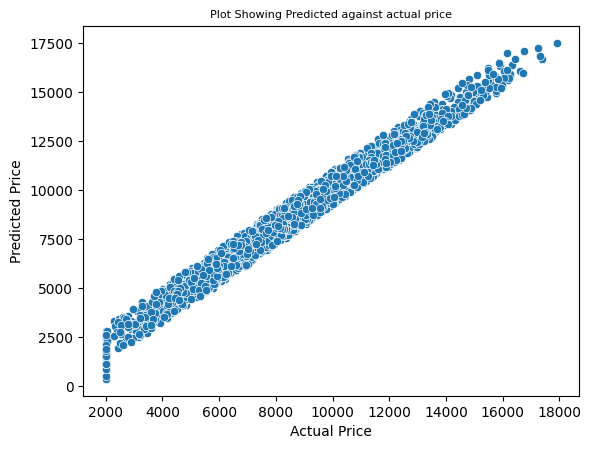

In [39]:
sns.scatterplot(x= y_test,y= y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Plot Showing Predicted against actual price', fontsize= 8)

Text(0.5, 1.0, 'Plot Showing Price Difference (Residual) against actual price')

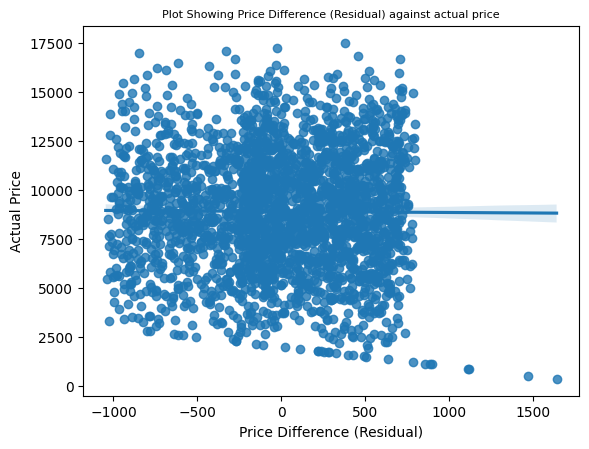

In [40]:
sns.regplot(x= y_test-y_pred,y= y_pred)
plt.ylabel('Actual Price')
plt.xlabel('Price Difference (Residual)')
plt.title('Plot Showing Price Difference (Residual) against actual price', fontsize= 8)

### Model Performance Analysis: Linear Regression  

The **Linear Regression model** achieved **98% accuracy** on both the training and testing sets, indicating no signs of overfitting. Additionally, the difference between training and testing **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)** is very low, further confirming no signs of overfitting in error metrics. The high error values are due to the magnitude of the target variable.  

- The first plot, which compares predicted price values against actual price values, shows a strong correlation between the two variables.  
- The second plot visualizes the residuals (the difference between predicted and actual values) against the actual price. Ideally, residuals should be evenly distributed around zero, indicating that the model's predictions are unbiased. However, the plot shows that the residuals are more dispersed around the zero line, suggesting some variance in prediction errors.  

In conclusion, this model generalizes well to the data.  

### Next Steps  
- Experiment with other **Decision Tree models** to evaluate their performance and identify potential improvements.  


In [41]:
decision = DecisionTreeRegressor()
decision.fit(x_train_scale, y_train)
y_pred_d = decision.predict(x_test_scale)

print(f'Test r2 score  : {r2_score(y_test, y_pred):.2f}')
print(f'Test mean absolute error  : {mean_absolute_error(y_test, y_pred_d):.2f}')
print(f'Test mean squared error  : {mean_squared_error(y_test, y_pred_d):.2f}')
print(f'Test root mean squared  : {root_mean_squared_error(y_test, y_pred_d):.2f}')

Test r2 score  : 0.98
Test mean absolute error  : 500.54
Test mean squared error  : 416148.12
Test root mean squared  : 645.10


In [42]:
print(f'Training r2 score  : {r2_score(y_train, decision.predict(x_train_scale)):.2f}')
print(f'Training mean absolute error  : {mean_absolute_error(y_train, decision.predict(x_train_scale)):.2f}')
print(f'Training mean squared error  : {mean_squared_error(y_train, decision.predict(x_train_scale)):.2f}')
print(f'Training root mean squared  : {root_mean_squared_error(y_train, decision.predict(x_train_scale)):.2f}')

Training r2 score  : 1.00
Training mean absolute error  : 0.00
Training mean squared error  : 0.00
Training root mean squared  : 0.00


Text(0.5, 1.0, 'Plot Showing Predicted against actual price')

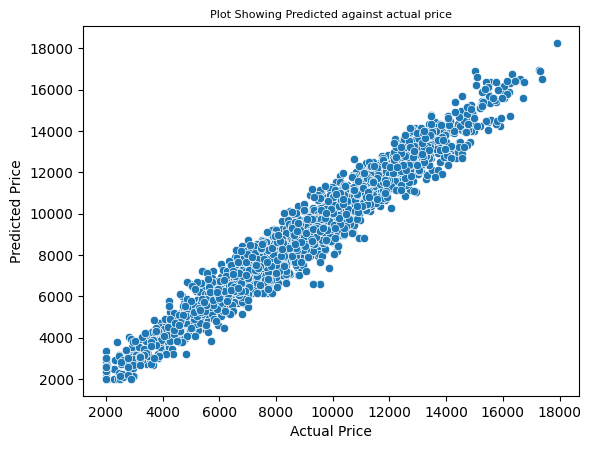

In [43]:
sns.scatterplot(x= y_test,y= y_pred_d)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Plot Showing Predicted against actual price', fontsize= 8)

Text(0.5, 1.0, 'Plot Showing Price Difference (Residual) against actual price')

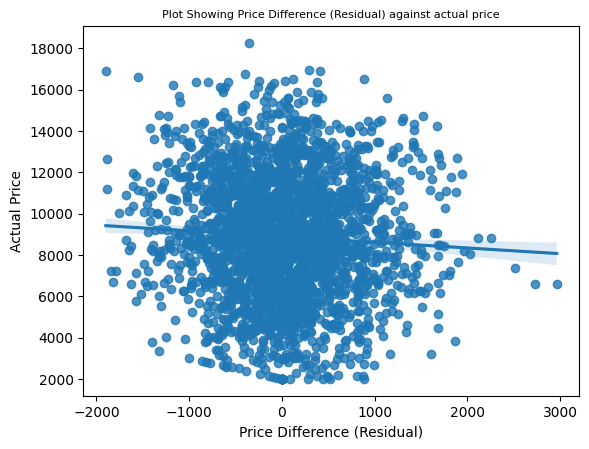

In [44]:
sns.regplot(x= y_test-y_pred_d,y= y_pred_d)
plt.ylabel('Actual Price')
plt.xlabel('Price Difference (Residual)')
plt.title('Plot Showing Price Difference (Residual) against actual price', fontsize= 8)

### Model Performance Analysis: Decision Tree  

The **Decision Tree model** achieved **100% accuracy** on the training set and **98% accuracy** on the testing set. The difference between training and test accuracy is **2% (0.02)**, which is within my personal threshold of **10% (0.1)**. This suggests no immediate signs of overfitting in terms of accuracy. However, the difference between training and testing **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)** is high, indicating signs of overfitting in the error metrics. The high error values are due to the magnitude of the target variable.  

- The first plot, which compares predicted price values against actual price values, shows a strong correlation between the two variables.  
- The second plot visualizes the residuals (the difference between predicted and actual values) against the actual price. Ideally, residuals should be evenly distributed around zero, indicating unbiased predictions. In this case, the residuals are centered around the zero line, suggesting low variance in prediction errors.  

In conclusion, while the model shows strong accuracy, it performs poorly on error metrics, likely due to overfitting.  

### Next Steps  
- Experiment with a **Random Forest model** to evaluate its performance and explore potential improvements.  


In [45]:
rand = RandomForestRegressor()
rand.fit(x_train_scale, y_train)
y_pred_r = rand.predict(x_test_scale)

print(f'Test r2 score  : {r2_score(y_test, y_pred):.2f}')
print(f'Test mean absolute error  : {mean_absolute_error(y_test, y_pred_r):.2f}')
print(f'Test mean squared error  : {mean_squared_error(y_test, y_pred_r):.2f}')
print(f'Test root mean squared  : {root_mean_squared_error(y_test, y_pred_r):.2f}')


Test r2 score  : 0.98
Test mean absolute error  : 345.15
Test mean squared error  : 189538.57
Test root mean squared  : 435.36


In [46]:

print(f'Training r2 score  : {r2_score(y_train, rand.predict(x_train_scale)):.2f}')
print(f'Training mean absolute error  : {mean_absolute_error(y_train, rand.predict(x_train_scale)):.2f}')
print(f'Training mean squared error  : {mean_squared_error(y_train, rand.predict(x_train_scale)):.2f}')
print(f'Training root mean squared  : {root_mean_squared_error(y_train, rand.predict(x_train_scale)):.2f}')

Training r2 score  : 1.00
Training mean absolute error  : 132.05
Training mean squared error  : 27826.44
Training root mean squared  : 166.81


Text(0.5, 1.0, 'Plot Showing Predicted against actual price')

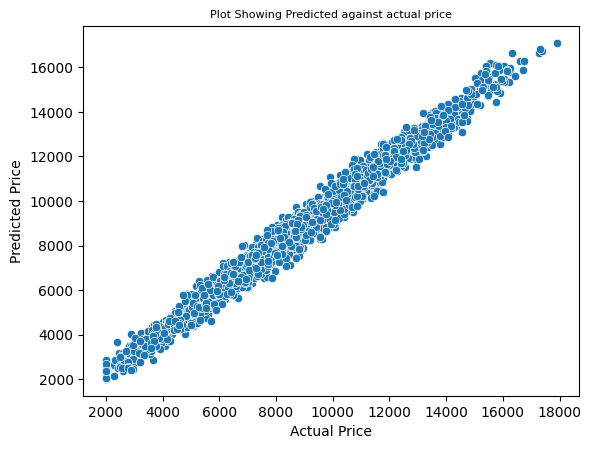

In [47]:
sns.scatterplot(x= y_test,y= y_pred_r)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Plot Showing Predicted against actual price', fontsize= 8)

Text(0.5, 1.0, 'Plot Showing Price Difference (Residual) against actual price')

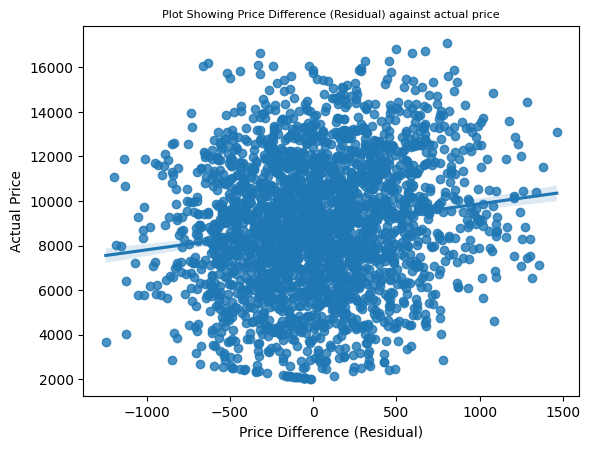

In [48]:
sns.regplot(x= y_test-y_pred_r,y= y_pred_r)
plt.ylabel('Actual Price')
plt.xlabel('Price Difference (Residual)')
plt.title('Plot Showing Price Difference (Residual) against actual price', fontsize= 8)

### Model Performance Analysis: Random Forest  

The **Random Forest model** achieved **100% accuracy** on the training set and **98% accuracy** on the testing set. The difference between training and test accuracy is **2% (0.02)**, which is within my personal threshold of **10% (0.1)**. This suggests no immediate signs of overfitting based on accuracy. However, the difference between training and testing **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)** is high, indicating signs of overfitting in the error metrics. The high error values are attributed to the magnitude of the target variable.  

- The first plot, which compares predicted price values against actual price values, shows a strong correlation between the two variables.  
- The second plot visualizes the residuals (the difference between predicted and actual values) against the actual price. Ideally, residuals should be evenly distributed around zero, indicating unbiased predictions. However, the plot shows that the residuals are more dispersed around the zero line, suggesting some variance in prediction errors.  

In conclusion, the model performs poorly due to overfitting, as indicated by the high error values.  

### Next Steps  
- Experiment with the **Gradient Boost model** to evaluate its performance and identify potential improvements.  


In [49]:
grad = GradientBoostingRegressor()
grad.fit(x_train_scale, y_train)
y_pred_g = grad.predict(x_test_scale)

print(f'Test r2 score  : {r2_score(y_test, y_pred):.2f}')
print(f'Test mean absolute error  : {mean_absolute_error(y_test, y_pred_g):.2f}')
print(f'Test mean squared error  : {mean_squared_error(y_test, y_pred_g):.2f}')
print(f'Test root mean squared  : {root_mean_squared_error(y_test, y_pred_g):.2f}')

Test r2 score  : 0.98
Test mean absolute error  : 275.14
Test mean squared error  : 113555.57
Test root mean squared  : 336.98


In [50]:

print(f'Training r2 score  : {r2_score(y_train, grad.predict(x_train_scale)):.2f}')
print(f'Training mean absolute error  : {mean_absolute_error(y_train, grad.predict(x_train_scale)):.2f}')
print(f'Training mean squared error  : {mean_squared_error(y_train, grad.predict(x_train_scale)):.2f}')
print(f'Training root mean squared  : {root_mean_squared_error(y_train, grad.predict(x_train_scale)):.2f}')

Training r2 score  : 0.99
Training mean absolute error  : 266.32
Training mean squared error  : 103703.52
Training root mean squared  : 322.03


Text(0.5, 1.0, 'Plot Showing Predicted against actual price')

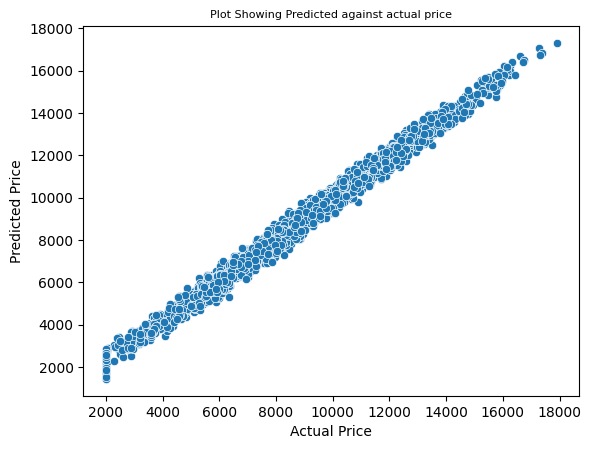

In [51]:
sns.scatterplot(x= y_test,y= y_pred_g)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Plot Showing Predicted against actual price', fontsize= 8)

Text(0.5, 1.0, 'Plot Showing Price Difference (Residual) against actual price')

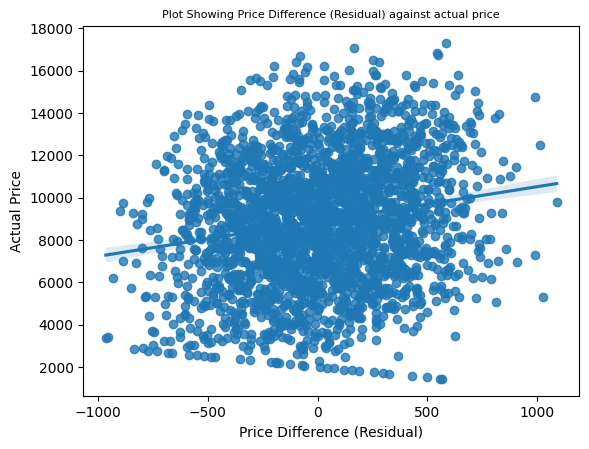

In [52]:
sns.regplot(x= y_test-y_pred_g,y= y_pred_g)
plt.ylabel('Actual Price')
plt.xlabel('Price Difference (Residual)')
plt.title('Plot Showing Price Difference (Residual) against actual price', fontsize= 8)

### Model Performance Analysis: Gradient Boosting  

The **Gradient Boost model** achieved **99% accuracy** on the training set and **98% accuracy** on the testing set. The difference between training and test accuracy is **2% (0.02)**, which is within my personal threshold of **10% (0.1)**. This suggests no immediate signs of overfitting based on accuracy. Additionally, the difference between training and testing **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** is very low, further indicating no signs of overfitting in error metrics. The high error values are due to the magnitude of the target variable.  

- The first plot, which compares predicted price values against actual price values, shows a strong correlation between the two variables.  
- The second plot visualizes the residuals (the difference between predicted and actual values) against the actual price. Ideally, residuals should be evenly distributed around zero, indicating that the model's predictions are unbiased. However, the plot shows that the residuals are more dispersed around the zero line, suggesting some variance in prediction errors.  

Overall, it can be stated that the model generalizes well to the data.  


### Conclusion: Linear Regression  

| Metric                          | Testing  | Training  | Difference |
|:--------------------------------:|:--------:|:---------:|:----------:|
| R-squared                        | 0.98     | 0.98      | 0          |
| Mean Absolute Error (MAE)        | 377.40   | 373.75    | 3.65       |
| Mean Squared Error (MSE)         | 210020.66| 208588.36 | 1432.3     |
| Root Mean Squared Error (RMSE)   | 458.28   | 456.71    | 1.57       |

The **Linear Regression model** performed well, with consistent results across both the training and testing sets. The difference in error metrics (MAE, MSE, RMSE) is minimal, indicating that the model generalizes well without overfitting. The errors are within an acceptable range for predicting car prices, making this model suitable for deployment.

---

### Conclusion: Gradient Boosting  

| Metric                          | Testing  | Training  | Difference |
|:--------------------------------:|:--------:|:---------:|:----------:|
| R-squared                        | 0.98     | 0.99      | 0.01       |
| Mean Absolute Error (MAE)        | 275.14   | 266.32    | 8.82       |
| Mean Squared Error (MSE)         | 113565.98| 103703.52 | 9862       |
| Root Mean Squared Error (RMSE)   | 337.00   | 322.03    | 14.97      |

The difference between training and test performance for the **Gradient Boosting model** is minimal, indicating good generalization. The slight increase in MSE and RMSE in the test set reflects natural variance in the test data. 

---

### Final Conclusion  

Although both models perform well, **Linear Regression** is the preferred model for predicting car prices due to its simplicity and consistency in error metrics across training and test sets.

---

Before we finish, we will add our predictions to the dataset and use NannyML to monitor model performance.

In [53]:
lin = LinearRegression()
lin.fit(X, y)
y_pro = lin.predict(X)
df['Pred_Price'] = y_pro.round(1)

In [54]:
x_train_scale


array([[-0.94365201, -0.4778807 , -1.20433333, ...,  1.78146645,
        -0.57427105,  0.94365201],
       [ 1.08040088,  1.29073772,  1.23227308, ...,  1.78146645,
        -0.57427105, -1.08040088],
       [-0.22077598, -0.4778807 , -1.20433333, ..., -0.5613353 ,
        -0.57427105,  0.22077598],
       ...,
       [-1.08822722, -1.3621899 ,  1.23227308, ..., -0.5613353 ,
        -0.57427105,  1.08822722],
       [-0.94365201,  0.40642851,  0.01396988, ..., -0.5613353 ,
        -0.57427105,  0.94365201],
       [ 0.35752485,  0.40642851,  1.23227308, ..., -0.5613353 ,
        -0.57427105, -0.35752485]])

In [55]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Pred_Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,8452.0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,12313.6
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,11192.2
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,11996.5
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,3191.9


In [56]:
df.to_csv('data/new_data.csv', index=False)